# Aula 1

In [3]:
import pandas as pd
notas = pd.read_csv('introducao-a-data-science-aula0/aula0/ml-latest-small/ratings.csv')

In [57]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [58]:
notas.shape

(100836, 4)

In [59]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [60]:
notas.head(10)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [61]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [62]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [63]:
print('Média', notas['nota'].mean())
print('Mediana',notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


<AxesSubplot:ylabel='Frequency'>

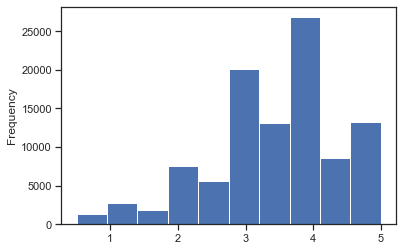

In [64]:
notas.nota.plot(kind='hist')

In [65]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

C:\Users\Carol\anaconda3\envs\alura\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

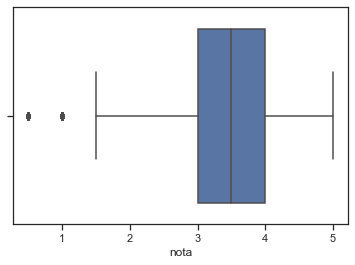

In [66]:
import seaborn as sns
data = notas.nota
sns.boxplot(data)

# Aula 2

In [67]:
filmes = pd.read_csv('introducao-a-data-science-aula0/aula0/ml-latest-small/movies.csv')

In [68]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [69]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando notas específicas por filme

In [70]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

In [71]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head(10)

filmeId
1     3.920930
2     3.431818
3     3.259615
4     2.357143
5     3.071429
6     3.946078
7     3.185185
8     2.875000
9     3.125000
10    3.496212
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

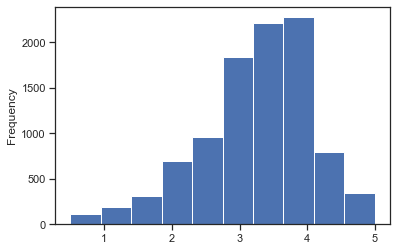

In [72]:
medias_por_filme.plot(kind='hist')

<AxesSubplot:ylabel='nota'>

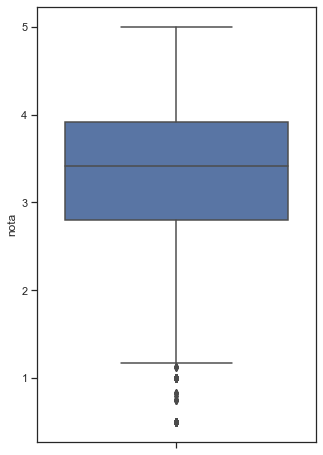

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize =(5,8))
sns.boxplot(y = medias_por_filme)

In [74]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

C:\Users\Carol\anaconda3\envs\alura\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

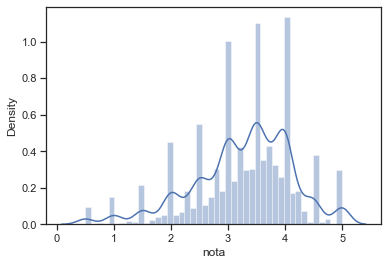

In [75]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

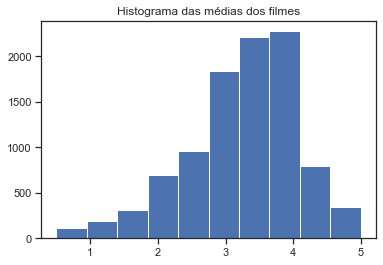

In [76]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# Aula 03

In [77]:
tmdb = pd.read_csv("introducao-a-data-science-aula0/aula0/archive/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [78]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

# Aula 04

In [79]:
tmdb.original_language.unique() # categoria nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [80]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'cs', 'ar', 'ro', 'id', 'ta', 'no',
       'ky', 'xx', 'nb', 'hu', 'el', 'is', 'af', 'sl', 'pl', 'vi', 'ps', 'te',
       'tr'],
      dtype='object')

In [81]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [82]:
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ['original_language', 'total']
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [83]:
import seaborn as sns

<AxesSubplot:xlabel='original_language', ylabel='total'>

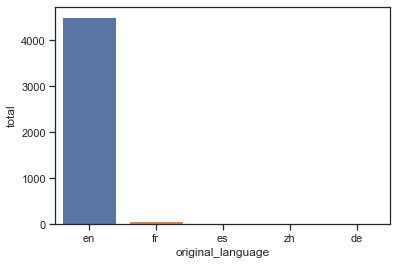

In [84]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_linguas.head())

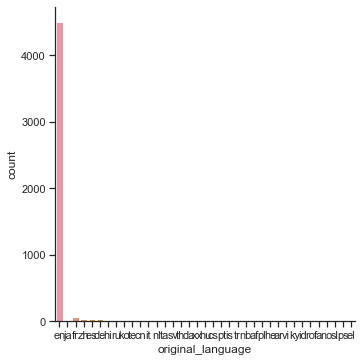

In [85]:
sns.catplot(x = "original_language", data = tmdb, kind = "count")

In [86]:
import matplotlib.pyplot as plt

In [87]:
#plt.pie(contagem_de_linguas['total'], labels = contagem_de_linguas['original_language'])

In [88]:
total_por_lingua = tmdb['original_language'].value_counts()
total_de_ingles = total_por_lingua.loc['en']
total_geral = total_por_lingua.sum()
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


<AxesSubplot:xlabel='lingua', ylabel='total'>

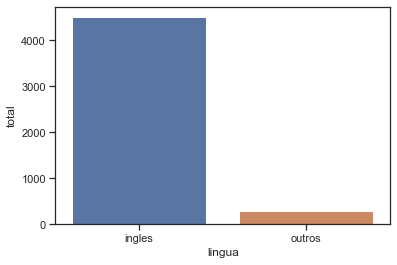

In [89]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(data = dados)
sns.barplot(x='lingua', y= 'total', data =dados)

In [90]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ar     2
cs     2
ro     2
id     2
ta     2
el     1
sl     1
is     1
tr     1
hu     1
ps     1
ky     1
vi     1
nb     1
xx     1
af     1
no     1
pl     1
te     1
Name: original_language, dtype: int64

# Aula 05

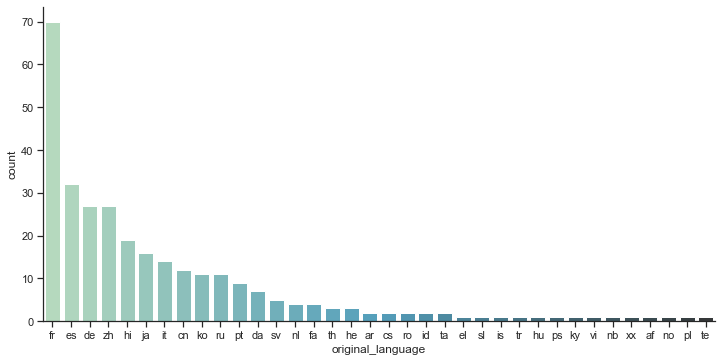

In [91]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", 
            data = filmes_sem_lingua_original_em_ingles, 
            kind = "count", aspect = 2, order =  total_por_lingua_de_outros_filmes.index,
            palette = "GnBu_d")

## Exemplo extra

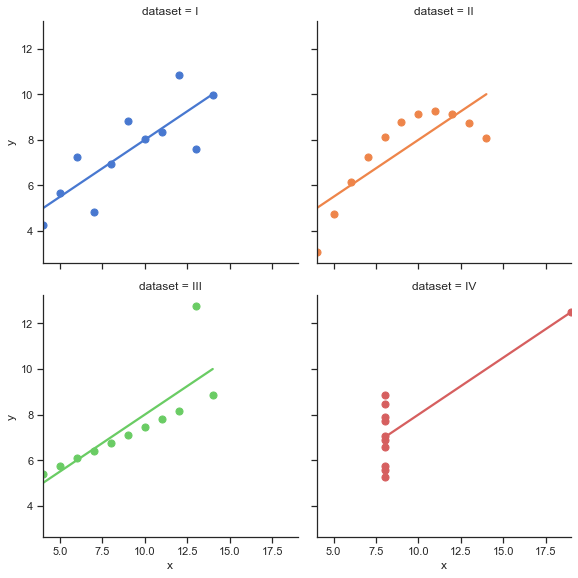

In [92]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Aula 06

In [94]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [103]:
notas_toy_story = notas.query("filmeId==1")
notas_jumanji = notas.query("filmeId==2")
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [104]:
print("Nota média do Toy Story %.2f" % notas_toy_story.nota.mean())

Nota média do Toy Story 3.92


In [106]:
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.mean())

Nota média do Jumanji 3.43


In [107]:
print("Nota média do Toy Story %.2f" % notas_toy_story.nota.median()) # comportamento central
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.median())

Nota média do Toy Story 4.00
Nota média do Jumanji 3.50


In [108]:
import numpy as np

In [114]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10)) # Concatena arrays
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [133]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


C:\Users\Carol\anaconda3\envs\alura\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Carol\anaconda3\envs\alura\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

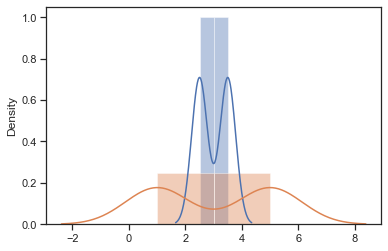

In [121]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

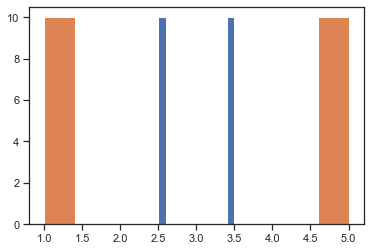

In [122]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2480ddd0e80>,
 'caps': [<matplotlib.lines.Line2D at 0x2480ff32640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2480df26640>,
 'medians': [<matplotlib.lines.Line2D at 0x2480ff5d5b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2480ff33340>,
 'means': []}

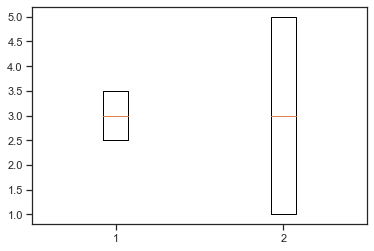

In [123]:
plt.boxplot([filme1, filme2])

C:\Users\Carol\anaconda3\envs\alura\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

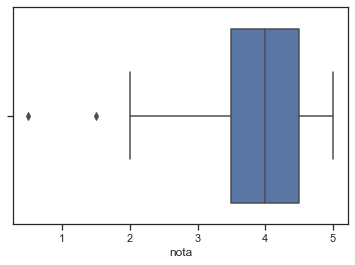

In [124]:
sns.boxplot(notas_toy_story.nota)

C:\Users\Carol\anaconda3\envs\alura\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

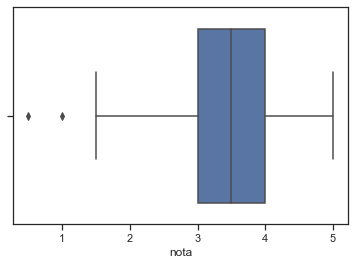

In [125]:
sns.boxplot(notas_jumanji.nota)

{'whiskers': [<matplotlib.lines.Line2D at 0x24811bec7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x24811beceb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24811bec490>,
 'medians': [<matplotlib.lines.Line2D at 0x24811bf75b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24811bf7910>,
 'means': []}

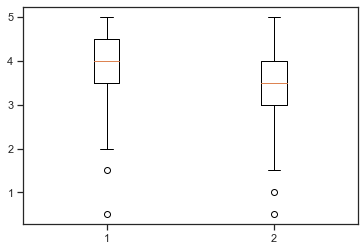

In [126]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

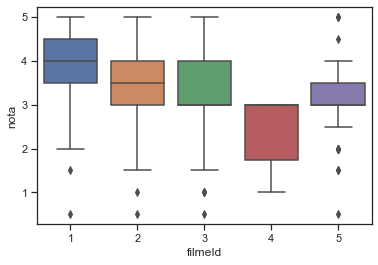

In [130]:
sns.boxplot(x = "filmeId", y= "nota", data = notas.query("filmeId in [1,2, 3, 4, 5]"))

In [132]:
print(notas_jumanji.nota.std())
print(notas_toy_story.nota.std())

0.8817134921476455
0.8348591407114047


************